In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
plt.style.use('ggplot')

data = pd.read_csv('diabetes.csv')

## Exploración descriptiva

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
display.display(data.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
rows_amount =  len(data.index.unique())
non_diabetic = data[data["Outcome"] == 0].count()["Outcome"]
diabetic = data[data["Outcome"] == 1].count()["Outcome"]

print('Número de filas: ' + str(rows_amount))
print(f'Número de no-diabeticos: {str(non_diabetic)}')
print(f'Número de diabeticos: {str(diabetic)}')
print("----------------------------------")
print(f"El {math.ceil(diabetic*100/rows_amount)}% de las muestran representan diabéticos")

Número de filas: 768
Número de no-diabeticos: 500
Número de diabeticos: 268
----------------------------------
El 35% de las muestran representan diabéticos


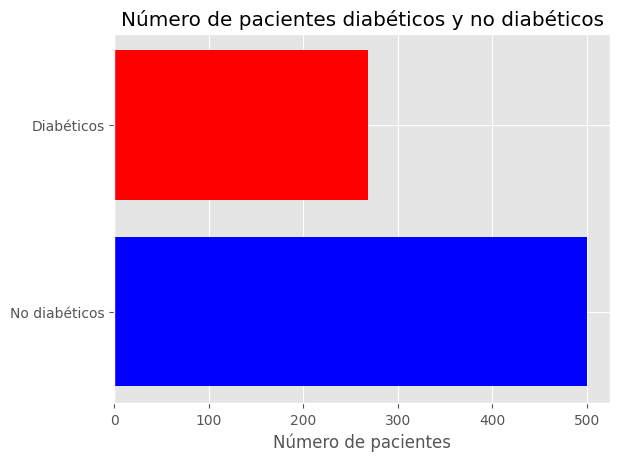

In [7]:
labels = ['No diabéticos', 'Diabéticos']
counts = [data[data["Outcome"] == 0].count()["Outcome"], data[data["Outcome"] == 1].count()["Outcome"]]

plt.barh(labels, counts, color=['blue', 'red'])
plt.xlabel('Número de pacientes')
plt.title('Número de pacientes diabéticos y no diabéticos')
plt.show()

## Visualización de datos

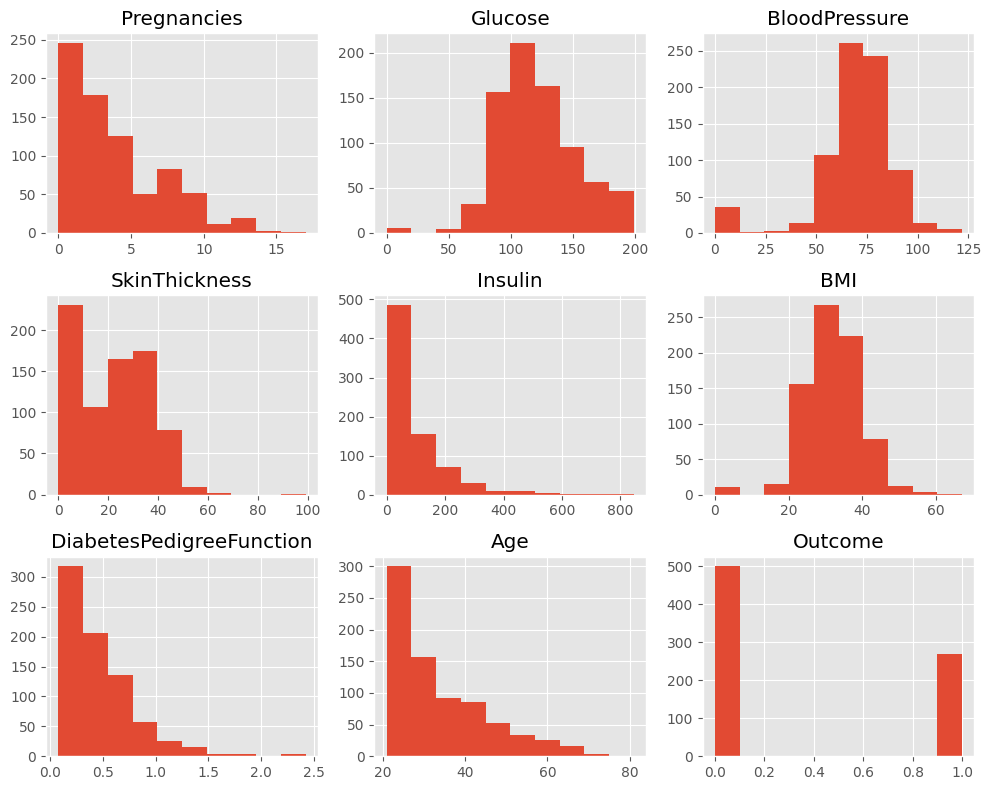

In [8]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()  

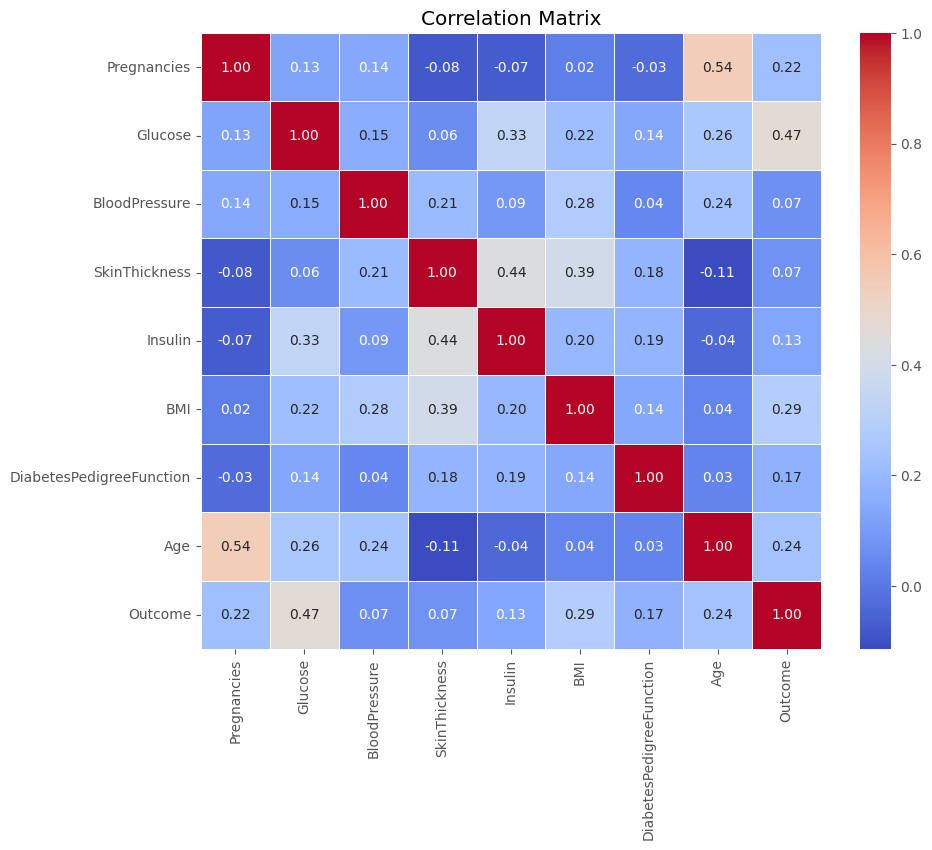

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


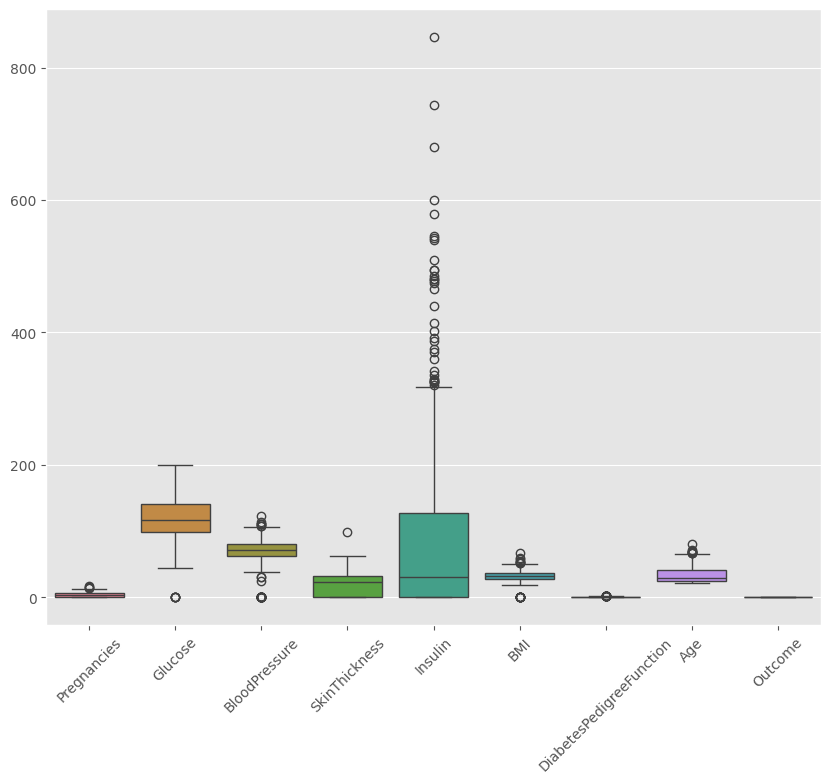

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [11]:
sns.pairplot(data,hue="Outcome")
plt.show()

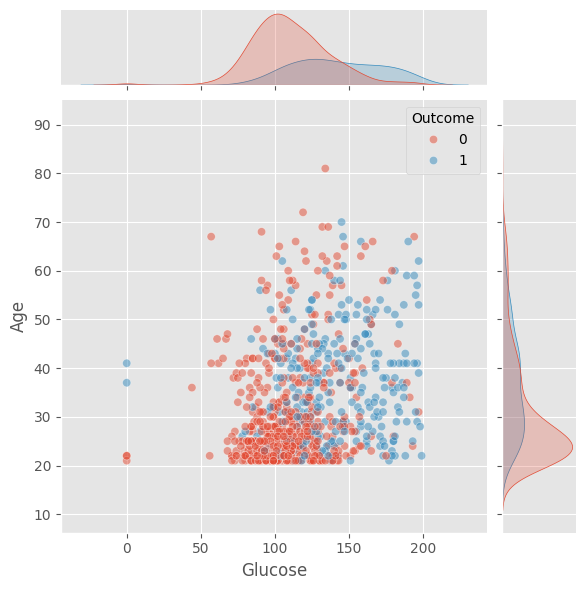

In [ ]:
sns.jointplot(x='Glucose', y='Age',hue="Outcome", data=data, kind='scatter',alpha=0.5);

Conclusiones aca

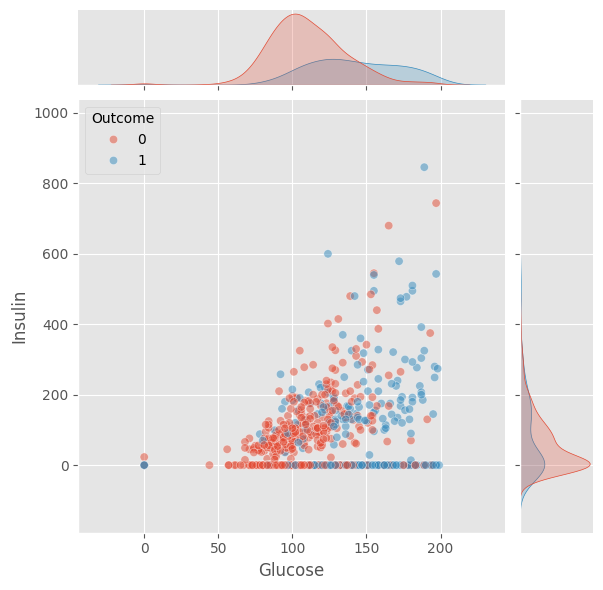

In [ ]:
sns.jointplot(x='Glucose', y='Insulin',hue="Outcome", data=data, kind='scatter',alpha=0.5);

## 3. Preprocesamiento

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data_clean = data 

In [ ]:
nulls_before = data_clean.isnull().sum().sum()
nulls_before

0

In [ ]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

data_clean.loc[data_clean['Glucose']==0, 'Glucose'] = np.nan
data_clean.loc[data_clean['BloodPressure']==0, 'BloodPressure'] = np.nan
data_clean.loc[data_clean['BMI']==0, 'BMI'] = np.nan
data_clean.loc[data_clean['Insulin']==0, 'Insulin'] = np.nan
data_clean.loc[data_clean['SkinThickness']==0, 'SkinThickness'] = np.nan

mean_bmi = data_clean['BMI'][data_clean['BMI'] != 0].mean()
data_clean.loc[data_clean['BMI'] == 0, 'BMI'] = mean_bmi

In [ ]:
nulls_now = data_clean.isnull().sum().sum()
print('Número de datos outliers descartados: ' + str(nulls_now - nulls_before))

Número de datos outliers descartados: 652


In [ ]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Exploración de datos preprocesados

## 5. Feature engineering